# Roadmap of Marvin: a tool to visualise and analyse MaNGA data.

This documentation assumes that you are familiar with MaNGA data and its acronyms. If that is not your case, consider reading https://www.sdss.org/dr15/manga/getting-started/.

https://sdss-marvin.readthedocs.io/en/latest/getting-started.html
All the Tools classes can be accessed from the marvin.tools module. Let’s load a DRP Cube

In [1]:
import marvin
from marvin import config
config.access = 'collab'
config.login()

/usr/local/lib/python3.7/dist-packages/marvin/extern/marvin_brain/python/brain/__init__.py:97: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(open(os.path.join(os.path.dirname(__file__), 'data/brain.yml')))
/usr/local/lib/python3.7/dist-packages/marvin/__init__.py:128: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)
/usr/local/lib/python3.7/dist-packages/marvin/extern/tree/python/tree/__init__.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(ff)
/usr/local/lib/python3.7/dist-packages/marvin/extern/sdss_access/python/sdss_access/__init__.py:31: YAMLLoadWarning: calling yaml.load(

INFO: No release version set. Setting default to MPL-8


/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
fitspath = '../8595_6101/manga-8595-6101-LOGCUBE.fits.gz'
my_cube = marvin.tools.Cube(filename=fitspath)
my_cube

<Marvin Cube (plateifu='8595-6101', mode='local', data_origin='file')>

In [6]:
print(my_cube.filename, my_cube.plateifu, my_cube.mangaid, my_cube.release)

../8595_6101/manga-8595-6101-LOGCUBE.fits.gz 8595-6101 1-197718 MPL-8


In [7]:
print(my_cube.ra, my_cube.dec)

219.031216217 49.7203386644


Similarly we can access the header of the file and the WCS object

In [8]:
my_cube.header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                   54 /                                                
NAXIS2  =                   54 /                                                
NAXIS3  =                 4563 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
AUTHOR  = 'Brian Cherinka & David Law <bcherin1@jhu.edu, dlaw@stsci.edu>' /     
VERSDRP2= 'v2_5_3  '           / MaNGA DRP version (2d processing)              
VERSDRP3= 'v2_5_3  '           / MaNGA DRP Version (3d processing)              
VERSPLDS= 'v5_1    '           / Platedesign Version                            
VERSFLAT= 'v1_31   '        

In [9]:
my_cube.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVE-LOG'  
CRVAL : 219.03122  49.720339  3.62159598486e-07  
CRPIX : 28.0  28.0  1.0  
CD1_1 CD1_2 CD1_3  : -0.000138889  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  0.000138889  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  8.33903304339e-11  
NAXIS : 54  54  4563

What is more, we can access the datamodel of the cube file, which show us what extensions are available, how they are named in Marvin, and what they contain

In [10]:
datamodel = my_cube.datamodel
datamodel

<DRPCubeDataModel release='MPL-8', n_datacubes=3, n_spectra=2>

In [11]:
datamodel.datacubes

[<DataCube 'flux', release='MPL-8', unit='1e-17 erg / (Angstrom cm2 s spaxel)'>,
 <DataCube 'dispersion', release='MPL-8', unit='Angstrom'>,
 <DataCube 'dispersion_prepixel', release='MPL-8', unit='Angstrom'>]

In [12]:
datamodel.spectra

[<Spectrum 'spectral_resolution', release='MPL-8', unit='Angstrom'>,
 <Spectrum 'spectral_resolution_prepixel', release='MPL-8', unit='Angstrom'>]

This tells us that this cube has two associated 3D datacubes, 'flux', 'dispersion', and 'dispersion_prepixel', and two associated spectra, 'spectral_resolution' and 'spectral_resolution_prepixel', as well as their associated units. We can get a desciption of what each of them

In [13]:
datamodel.datacubes.flux.description

'3D rectified cube'

In [14]:
datamodel.datacubes.dispersion.description

'Broadened dispersion solution (1sigma LSF)'

In [15]:
datamodel.datacubes.dispersion_prepixel.description

'Broadened pre-pixel dispersion solution (1sigma LSF)'

In [20]:
datamodel.spectra.spectral_resolution.description

'Median spectral resolution as a function of wavelength for the fibers in this IFU'

In [21]:
datamodel.spectra.spectral_resolution_prepixel.description

'Median pre-pixel spectral resolution as a function of wavelength for the fibers in this IFU'

In my_cube, we can use the name of each of these datacubes and spectra to access the associated data quantity. Let’s get the cube flux

In [22]:
flux = my_cube.flux

In [23]:
flux

<DataCube [[[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]],

           [[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]],

           [[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]],

           ...,

           [[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
      

The flux is represented as a 3D array with units. We can also access the inverse variance and the mask using flux.ivar and flux.mask, respectively. We can slice this datacube to get another datacube

In [29]:
flux[:, 50:60, 50:60].shape

(4563, 4, 4)

Or get a single spectrum and plot it:

In [39]:
spectrum = flux[:, 25, 33]
# flux at all wavelength at pixel position (25, 33)
spectrum

<Spectrum [0.05168502, 0.05318479, 0.09292772, ..., 0.        , 0.        ,
           0.        ] 1e-17 erg / (Angstrom cm2 s spaxel)>

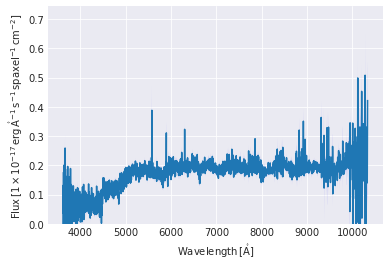

In [40]:
spectrum.plot(show_std=True)

From a DRP cube we can get the associated DAP Maps object for a certain bintype

In [59]:
hyb_maps = my_cube.getMaps(bintype='HYB10')
# /scratch/shared_data/manga/MPL8-DAP/HYB10-MILESHC-MILESHC/8595/manga-8595-6101-LOGCUBE-HYB10-MILESHC-MILESHC.fits.gz
# hyb10path = "../8595_6101/manga-8595-6101-MAPS-HYB10-MILESHC-MILESHC.fits.gz"
# import os
# os.path.isfile(hyb10path)
# hyb_maps = marvin.tools.Maps(filename=fitspath)

In [60]:
hyb_maps

<Marvin Maps (plateifu='8595-6101', mode='remote', data_origin='api', bintype='HYB10', template='MILESHC-MILESHC')>

A Maps behaves very similarly to a Cube and everything we have discussed above will still work. Instead of datacubes and spectra, a Maps object contains a set of 2D quantities called Map, each one of them representing a different property measured by the DAP. One can get a full list of all the properties available using the datamodel

In [61]:
hyb_maps.datamodel

[<Property 'spx_skycoo', channel='on_sky_x', release='2.3.0', unit='arcsec'>,
 <Property 'spx_skycoo', channel='on_sky_y', release='2.3.0', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='elliptical_radius', release='2.3.0', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='r_re', release='2.3.0', unit=''>,
 <Property 'spx_ellcoo', channel='elliptical_azimuth', release='2.3.0', unit='deg'>,
 <Property 'spx_mflux', channel='None', release='2.3.0', unit='1e-17 erg / (cm2 s spaxel)'>,
 <Property 'spx_snr', channel='None', release='2.3.0', unit=''>,
 <Property 'binid', channel='binned_spectra', release='2.3.0', unit=''>,
 <Property 'binid', channel='stellar_continua', release='2.3.0', unit=''>,
 <Property 'binid', channel='em_line_moments', release='2.3.0', unit=''>,
 <Property 'binid', channel='em_line_models', release='2.3.0', unit=''>,
 <Property 'binid', channel='spectral_indices', release='2.3.0', unit=''>,
 <Property 'bin_lwskycoo', channel='lum_weighted_on_sky_x', release='2.3.0',

Note that some properties such as 'spx_skycoo' have multiple channels (in this case the on-sky x and y coordinates). We can get more information about a property

In [62]:
hyb_maps.datamodel.spx_skycoo_on_sky_x.description

'Offsets of each spaxel from the galaxy center. Channel = On-sky X.'

In [63]:
hyb_maps.datamodel.spx_skycoo_on_sky_y.description

'Offsets of each spaxel from the galaxy center. Channel = On-sky Y.'

See the datamodel section for more information on how to use this feature. We can retrieve the map associated to a specific property directly from the Maps instance. For example, let’s get the H 𝛼 emission line flux (fitted by a Gaussian) from a Maps file

In [65]:
ha = hyb_maps.emline_gflux_ha_6564

In [66]:
ha

<Marvin Map (property='emline_gflux_ha_6564')>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 1e-17 erg / (cm2 s spaxel)

Map quantities are similar to DataCube but wrap a 2D array. We can plot the Map as

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/lib/python3/dist-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


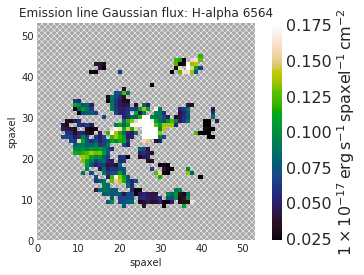

In [67]:
fig, ax = ha.plot()

Note that the [`plot`](https://sdss-marvin.readthedocs.io/en/latest/reference/quantities.html#marvin.tools.quantities.map.Map.plot) method returns the matplotlib [`Figure`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) and [`Axes`](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) for the plot. We can use those to modify or save the plot. Marvin plotting routines try to select the best parameters, colour maps, and dynamic ranges. You can modify those by passing extra arguments to [`plot`](https://sdss-marvin.readthedocs.io/en/latest/reference/quantities.html#marvin.tools.quantities.map.Map.plot). You can learn more in the [Map plotting](https://sdss-marvin.readthedocs.io/en/latest/tools/utils/plot-map.html#marvin-utils-plot-map) section. We will talk about the [`Map`](https://sdss-marvin.readthedocs.io/en/latest/reference/quantities.html#marvin.tools.quantities.map.Map) class in detail in [Working with Astropy Quantities](https://sdss-marvin.readthedocs.io/en/latest/getting-started.html#marvin-quantities) and in [Map](https://sdss-marvin.readthedocs.io/en/latest/tools/map.html#marvin-map).

Let’s take a step back and go back to hyb_maps, our Maps instance. We can access the targeting bits for that galaxy (for an introduction to maskbits check this page)

In [68]:
hyb_maps.target_flags

[<Maskbit 'MANGA_TARGET1' ['PRIMARY_v1_2_0']>,
 <Maskbit 'MANGA_TARGET2' []>,
 <Maskbit 'MANGA_TARGET3' []>]

Note that in this case the galaxy belongs to the primary sample from the final target selection (PRIMARY_v1_2_0) as well as to the primary and colour enhanced samples from several commissioning target selections. The galaxy does not have any ancillary bit (manga_target3).
Similarly, we can access quality flags, which indicate us if there is something we need to know about the data

In [69]:
hyb_maps.quality_flag

<Maskbit 'MANGA_DAPQUAL' []>

In this case the `MANGA_DAPQUAL` maskbit does not have any bit activated, which means the data is safe to use. See the [Maskbits](https://sdss-marvin.readthedocs.io/en/latest/reference/utils.html#marvin-utils-maskbit) section for more information.

For each target we can also access additional catalogue data: the associated parameters from the [NASA Sloan Atlas](http://nsatlas.org/), and the [DAPall](https://testng.sdss.org/dr15/manga/manga-data/catalogs/#DAPALLFile) file

In [70]:
hyb_maps.nsa

{'iauname': 'J143607.49+494313.2',
 'subdir': '14h/p48/J143607.49+494313.2',
 'ra': 219.031216216703,
 'dec': 49.7203386643674,
 'isdss': 213644,
 'ined': -1,
 'isixdf': -1,
 'ialfalfa': -1,
 'izcat': 351206,
 'itwodf': -1,
 'mag': 16.799967,
 'z': 0.12535109,
 'zsrc': 'sdss   ',
 'size': 0.032973114,
 'run': 3180,
 'camcol': 3,
 'field': 92,
 'rerun': '301',
 'xpos': 1293.0586,
 'ypos': 1016.3787,
 'nsaid': 209150,
 'zdist': 0.12573443,
 'sersic_nmgy': [-0.192891418933868,
  2.44456100463867,
  34.2351379394531,
  196.754455566406,
  640.33154296875,
  937.211364746094,
  1214.09765625],
 'sersic_nmgy_ivar': [0.0999814420938492,
  0.439270317554474,
  0.21798013150692,
  0.0676891058683395,
  0.00700087333098054,
  0.00327209569513798,
  0.000852833618409932],
 'sersic_ok': 1,
 'sersic_rnmgy': [0.535620927810669,
  1.25072491168976,
  37.3727378845215,
  205.864288330078,
  581.910766601562,
  919.505126953125,
  1336.4267578125],
 'sersic_absmag': [-14.7289085388184,
  -17.2522773742

In [71]:
hyb_maps.dapall

{'adist_nsa_z': 324.297,
 'adist_z': 324.297,
 'bin_r_n_1': 113.0,
 'bin_r_n_2': 43.0,
 'bin_r_n_3': 0.0,
 'bin_r_snr_1': 15.1008,
 'bin_r_snr_2': 7.72835,
 'bin_r_snr_3': 0.0,
 'bin_rmax': 1.36353,
 'binkey': 'HYB10',
 'binsnr': 10.0,
 'bintype': 'voronoi',
 'dapbins': 1277,
 'dapdone': 'true',
 'dapqual': 0,
 'daptype': 'HYB10-MILESHC-MILESHC',
 'datedap': '2019-02-02',
 'drp3qual': 0,
 'drpallindx': 3204,
 'elfkey': 'EFITMPL8DB',
 'elmkey': 'EMOMMPL8',
 'emline_gew_1re_ariii_7137': None,
 'emline_gew_1re_ariii_7753': None,
 'emline_gew_1re_h11_3771': None,
 'emline_gew_1re_h12_3751': None,
 'emline_gew_1re_ha_6564': 0.236098,
 'emline_gew_1re_hb_4862': 0.452571,
 'emline_gew_1re_hdel_4102': 0.553571,
 'emline_gew_1re_hei_3889': 0.793182,
 'emline_gew_1re_hei_5877': 0.27046,
 'emline_gew_1re_hei_7067': None,
 'emline_gew_1re_heii_4687': 0.236361,
 'emline_gew_1re_heps_3971': 0.523461,
 'emline_gew_1re_heta_3836': 1.3595,
 'emline_gew_1re_hgam_4341': 0.375592,
 'emline_gew_1re_hthe_37

The NSA and DAPall catalogues are implemented as mixins via NSAMixIn and DAPAllMixIn, respectively.

While Marvin allows you to access data remotely, frequently you will find that you want to download the file associated to an object so that you can access it more quickly in the future. We can do that using the MarvinToolsClass.download method. Let’s try to load a cube that we know we do not have in out hard drive

In [72]:
# hyb_maps.download()

SDSS_ACCESS> syncing... please wait
SDSS_ACCESS> Done!


/usr/local/lib/python3.7/dist-packages/marvin/tools/maps.py:213: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/sdss_access/20191220_001/sdss_access_00.err' mode='w' encoding='UTF-8'>
  return super(Maps, self).download(path_type, **params)
/usr/lib/python3.7/subprocess.py:883: ResourceWarning: subprocess 25302 is still running
  ResourceWarning, source=self)


In [81]:
# hyb_maps = marvin.tools.Maps("8595-6101")
# hyb_maps
# hyb_maps.datamodel
# ok

In [86]:
# Not fitspath!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# hyb_maps = marvin.tools.Maps(filename=fitspath)


# hyb10path = "/home/anything/sas/mangawork/manga/spectro/analysis/v2_5_3/2.3.0/HYB10-MILESHC-MILESHC/8595/6101/manga-8595-6101-MAPS-HYB10-MILESHC-MILESHC.fits.gz"

# or:
hyb10path = "../8595_6101/manga-8595-6101-MAPS-HYB10-MILESHC-MILESHC.fits.gz"
# so now you know what are MAPs

# manga-8595-6101-MAPS-HYB10-MILESHC-MILESHC.fits.gz


hyb_map = marvin.tools.Maps(filename = hyb10path)
hyb_maps

<Marvin Maps (plateifu='8595-6101', mode='local', data_origin='file', bintype='HYB10', template='MILESHC-MILESHC')>

Finally, we can extract one or more Spaxel object from a Galaxy Tool. We can either use the standard array slicing notation (0-indexed, origin of coordinates in the lower left corner of the array)

In [88]:
spaxel = my_cube[15, 10]
spaxel

<Marvin Spaxel (plateifu=8595-6101, x=10, y=15; x_cen=-17, y_cen=-12, loaded=cube)>

or we can use getSpaxel, which accepts multiple arguments (refer to the method’s documentation). Note that by default, (x, y) coordinates passed to getSpaxel are measured from the centre of the array

In [90]:
central_spaxel = my_cube.getSpaxel(x=0, y=0)
central_spaxel

<Marvin Spaxel (plateifu=8595-6101, x=27, y=27; x_cen=0, y_cen=0, loaded=cube)>

Spaxel and Bin will be treated in detail in the marvin–subregion-tools section.

## Working with Astropy Quantities
Marvin presents scientific data in the form of [Astropy Quantities](http://docs.astropy.org/en/stable/units/quantity.html#quantity). A Quantity is essentially a number with an associated physical unit. In Marvin we expand on that concept and extend the Quantities with a mask, an inverse variance ([why do we use ivar in MaNGA?](https://www.sdss.org/manga/manga-tutorials/manga-faq/#WhydoyououtputIVAR(inversevariance)insteadoferrors?)) and, when relevant, the associated wavelength. Marvin Quantities also provide useful methods to, for instance, calculate the SNR or plot the value. Marvin provides Quantities for 1D ([`Spectrum`](https://sdss-marvin.readthedocs.io/en/latest/reference/quantities.html#marvin.tools.quantities.spectrum.Spectrum), [`AnalysisProperty`](https://sdss-marvin.readthedocs.io/en/latest/reference/quantities.html#marvin.tools.quantities.analysis_props.AnalysisProperty)), 2D ([`Map`](https://sdss-marvin.readthedocs.io/en/latest/reference/quantities.html#marvin.tools.quantities.map.Map)), and 3D data ([`DataCube`](https://sdss-marvin.readthedocs.io/en/latest/reference/quantities.html#marvin.tools.quantities.datacube.DataCube)).

All Quantities behave similarly. Let’s start by getting a datacube (3D Quantity) from a [`Cube`](https://sdss-marvin.readthedocs.io/en/latest/reference/tools.html#marvin.tools.cube.Cube) object

In [91]:
flux.wavelength

<Quantity [ 3621.59598486,  3622.42998417,  3623.26417553, ...,
           10349.03843826, 10351.42166679, 10353.80544415] Angstrom>

In [95]:
flux_section = flux[1000:2000, 15:20, 15:20]
flux_section;
flux_section.value;
flux_section.unit
# flux_section.unit.scale

Unit("1e-17 erg / (Angstrom cm2 s spaxel)")

It’s important to pay attention to the scale to convert to physical units. If you prefer to have the scale included in the value you can use the descale method

In [96]:
flux.value[1000, 15, 15]

0.032087475

In [97]:
descaled = flux.descale();
descaled.value[1000, 15, 15]

/usr/local/lib/python3.7/dist-packages/marvin/tools/quantities/base_quantity.py:202: RuntimeWarning: overflow encountered in true_divide
  ivar_descaled = self.ivar / (self.unit.scale ** 2)


3.2087473e-19

We can also access the associated inverse variance or convert it to error, as well as compute the signal-to-noise ratio
variance 的导数，即 $\frac{1}{\sigma^2}$

In [102]:
# 
flux.ivar[1000, 15, 15]

6363.267

In [105]:
(1/6363.267)**0.5 # 标准差

0.012536027229258324

In [103]:
flux.error[1000, 15, 15]

<Quantity 0.01253603 1e-17 erg / (Angstrom cm2 s spaxel)>

In [106]:
flux.snr[1000, 15, 15]

2.5596206

The mask associated with the values is easily accessible via the mask attribute. We can also use the masked method to return a Numpy masked array in which the values that should not be used have been masked away

In [107]:
flux_section.masked

masked_array(
  data=[[[0.032087475061416626, 0.04121425375342369,
          0.050076354295015335, 0.05647555738687515,
          0.05469176545739174],
         [0.03209947049617767, 0.03639042377471924,
          0.040828000754117966, 0.04658112674951553,
          0.04227665066719055],
         [0.03019268997013569, 0.028818607330322266,
          0.03064817190170288, 0.033731523901224136,
          0.03370772302150726],
         [0.024737343192100525, 0.020018398761749268,
          0.02560598962008953, 0.03211492672562599, 0.03473940119147301],
         [0.020598897710442543, 0.02054685167968273,
          0.02890884317457676, 0.04129589721560478, 0.04637172818183899]],

        [[0.02228431962430477, 0.023608069866895676,
          0.022303054109215736, 0.01658300869166851,
          0.020516999065876007],
         [0.024636751040816307, 0.03168349713087082,
          0.03729921579360962, 0.03933802247047424,
          0.039510875940322876],
         [0.020158464089035988, 0.03292

Quantities have an associated [`pixmask`](https://sdss-marvin.readthedocs.io/en/latest/reference/quantities.html#marvin.tools.quantities.base_quantity.QuantityMixIn.pixmask), which provides a simple way to interact with the mask bits (for more information, go to the [Maskbits](https://sdss-marvin.readthedocs.io/en/latest/tools/utils/maskbit.html#marvin-maskbit) section)

In [108]:
flux.pixmask

<Maskbit 'MANGA_DRP3PIXMASK' shape=(4563, 54, 54)>

In [109]:
flux.pixmask.get_mask('NOCOV')  # Returns a mask of values with the NOCOV maskbit.

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

We can also slice a datacube to get a single spectrum

In [111]:
spectrum_20_20 = flux[:, 20, 20]
spectrum_20_20

<Spectrum [-0.05742054,  0.00044591, -0.05618221, ...,  0.        ,
            0.        ,  0.        ] 1e-17 erg / (Angstrom cm2 s spaxel)>

In this case the returned Quantity is a 1D Spectrum. This new Quantity behaves exactly as the DataCube but in this case we can also plot the spectrum

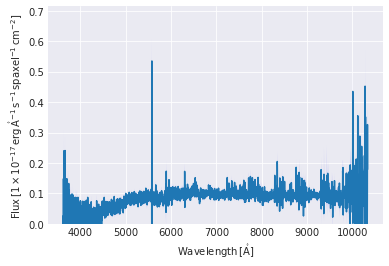

In [112]:
spectrum_20_20.plot()

Let’s now have a look at the Marvin 2D Quantity: the Map.

In [115]:
ha = hyb_map.emline_gflux_ha_6564
ha

<Marvin Map (property='emline_gflux_ha_6564')>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 1e-17 erg / (cm2 s spaxel)

In [116]:
snr = ha.snr
snr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

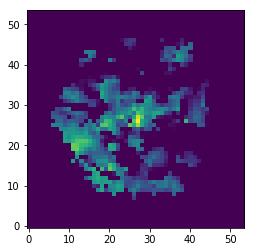

In [118]:
import matplotlib.pyplot as plt
plt.imshow(snr, origin='lower')

`Map` objects are a bit special, though, and we will discuss them in detail in [their own section](https://sdss-marvin.readthedocs.io/en/latest/tools/map.html#marvin-map). Here, let’s see how we can do “Map arithmetic” by calculating the $H_\alpha/H_\beta$ ratio

In [121]:
hb = hyb_map.emline_gew_hb_4862
hb

<Marvin Map (property='emline_gew_hb_4862')>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] Angstrom

In [122]:
ha_hb = ha / hb
ha_hb

<Marvin EnhancedMap>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32) '1e-17 erg / (Angstrom cm2 s spaxel)'

/usr/local/lib/python3.7/dist-packages/marvin/utils/plot/map.py:111: RuntimeWarning: invalid value encountered in multiply
  low_snr[np.abs(value * np.sqrt(ivar)) < snr_min] = True
/usr/local/lib/python3.7/dist-packages/marvin/utils/plot/map.py:111: RuntimeWarning: invalid value encountered in less
  low_snr[np.abs(value * np.sqrt(ivar)) < snr_min] = True


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1b80c00c90>)

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/lib/python3/dist-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


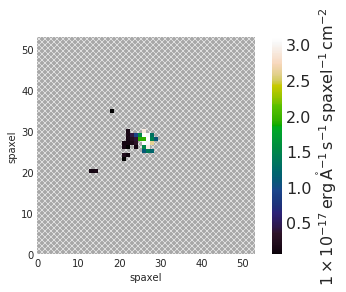

In [123]:
ha_hb.plot()

[`EnhancedMap`](https://sdss-marvin.readthedocs.io/en/latest/reference/quantities.html#marvin.tools.quantities.map.EnhancedMap) result from the arithmetic combination of two maps and take care of all the gritty details: error propagation, division by zero, maskbit propagation, etc.

Finally, [`AnalysisProperty`](https://sdss-marvin.readthedocs.io/en/latest/reference/quantities.html#marvin.tools.quantities.analysis_props.AnalysisProperty) are 1D quantities associated with a value for a single spaxel on a [`Map`](https://sdss-marvin.readthedocs.io/en/latest/reference/quantities.html#marvin.tools.quantities.map.Map). We will discuss them in depth when we talk about marvin-subregion-tools.

In [395]:
# flux[0,0,0].wavelength
# lambda0 = flux[0,0,0].wavelength
# lambdaend = flux[-1,0,0].wavelength
# dlambda = (lambdaend-lambda0)/len(flux[:,0,0])

# lambda0 = lambda0.value
# dlambda = dlambda.value
# type(dlambda)

startindex, endindex = 0, 0
for i in (flux[:,0,0].wavelength.value):
    if i<8315:
        startindex += 1
    else:
        break
for i in (flux[:,0,0].wavelength.value):
    if i<8328:
        endindex += 1
    else:
        break


In [396]:
# from 1911.06338, the source has emission line at 8300-8350
flux[0,:,:].shape; #(54, 54)
flux[0,:,:].value;
# startindex = int((8315 - lambda0)/dlambda)
# endindex = int((8330 - lambda0)/dlambda)

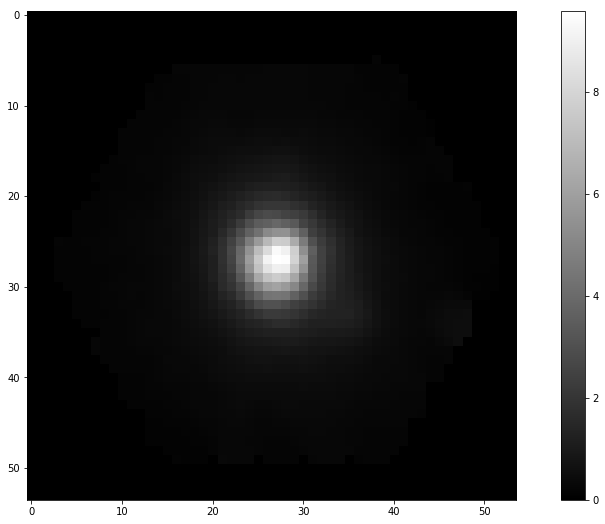

In [397]:
# narrow_band_img = []
import numpy as np
%matplotlib inline
%config InlineBackend.rc = {}
narrow_band_img = np.zeros(shape=flux[0,:,:].shape)
for idx in range(startindex, endindex+1):
    narrow_band_img += flux[idx,:,:].value
# image_hist = plt.hist(final_image.flatten(), 10)
plt.figure(figsize=(16,9))
plt.imshow(narrow_band_img, cmap='gray')#, vmin=2.e3, vmax=3.e3
plt.colorbar()

# You need foregroud galaxy substraction
by either:
1. fit a elliptical galaxy image directly from 2d image and substract it, or
2. fit continum spectras pixel by pixel then substract them, then replot the narrow band image to see the images of lensed source

in 1911.06338 Saburu paper:
The lens light has been sub-
tracted using the neighbouring continuum, and a correction
has been made to remove a radial trend in the net image
(caused by gradients in spectral features in the lens galaxy).

in SDSS IV MANGA paper: section 3.1, Foreground Galaxy Subtraction
before using PCA, you need to handle the redshift, today(191220) you can implimenting PCA first to see if the lensing system is significant after foreground galaxy subtraction, but later you need to figure out the dependence of redshift,


we constructed a best-fit model spectrum to the galaxy
continuum using a basis of 7 principal component analysis
(PCA) eigenspectra, and subtracted this continuum model
from the data. Fibres which were at too low a S/N to yield
a spectroscopic redshift were discarded from consideration
in the search for background emission-lines.


you need to choose the second method

Yet 1d pca or 2d pca or 3d pca?

https://learnche.org/pid/latent-variable-modelling/principal-component-analysis/pca-example-analysis-of-spectral-data
https://nirpyresearch.com/principal-component-regression-python/


In [398]:
# # https://www.jianshu.com/p/044a7783980f
# def PCA(dataMat,topNfeat=5):
# #topNfeat=5 默认选择前五个最大的特征值
# #减去均值 
#     meanVals = np.mean(dataMat,axis = 0)
#     dataMean = dataMat - meanVals
# #求协方差方阵 
#     conMat = dataMean.T.dot(dataMean)
# #求特征值和特征向量
#     eigVals,eigVects = np.linalg.eig(conMat)  
# #对特征值进行排序  
#     eigValInd = np.argsort(eigVals)
#     #得到的eigValInd是从小到大的排列，对应的原数据中该元素的索引
#     #x = np.array([3, 1, 2])
#     #np.argsort(x)
#     #array([1, 2, 0])
#     #从小到大依次是1,2,3,1对应的索引是1,2对应的索引是2,3对应的索引是0
#     eigValInd = eigValInd[:-(topNfeat+1):-1]
#     #逆序，从最大到最小的前topNfeat个
# #除去不需要的特征向量
#     redeigVects=eigVects[:,eigValInd]  
# #求新的数据矩阵
#     lowdataMat = dataMean.dot(redeigVects)
# #求从低维还原回来的数据
#     condata = (lowdataMat.dot(redeigVects.T)) + meanVals
# #输出降完维德数据加均值
#         #因为降维后的数据是一维的了，所以只能加上dataMat整体的平均数进行恢复了
#     reducedata=lowdataMat+np.mean(dataMat)
#     return reducedata,condata

In [399]:
# redflux = np.zeros(flux.shape) # reduced flux
# Ncomp = 10
# redflux.shape
# dataMattest = np.array((flux[:,25,25].wavelength.value, flux[:,25,25].value))
# # dataMat.shape
# plt.figure(figsize=(16,9))
# plt.plot(flux[:,25,25].wavelength.value,flux[:,25,25].value,label="model")
# _, x0y1test = PCA(dataMattest,topNfeat=Ncomp)
# plt.plot(x0y1test[0,:],x0y1test[1,:],label="rec")
# plt.plot(x0y1test[0,:],x0y1test[1,:]-flux[:,25,25].value,label="rec-model")
# plt.legend()
# print(_.shape)

In [400]:
# # flux[:,0,0].wavelength.value.shape
# x = flux[:,0,0].wavelength.value

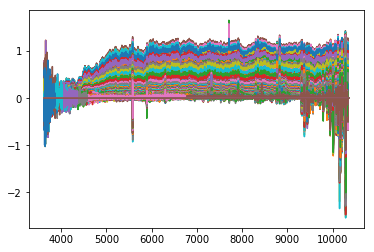

In [309]:
for i in range(redflux.shape[1]):
    for j in range(redflux.shape[2]):
        y = flux[:,i,j].value
#         y = flux[startindex:endindex, i,j]
        plt.plot(x,y)
#         dataMat = np.array((x,y)).T
#         _, x0y1 = PCA(dataMat,topNfeat=Ncomp)
#         redflux[:,i,j]=x0y1[1,:]

In [401]:
combflux = np.zeros((flux.shape[0],flux.shape[1]*flux.shape[2])) # combined flux
print(combflux.shape)
combflux = flux.value.reshape(flux.shape[0],flux.shape[1]*flux.shape[2])
# combflux = combflux.T
# print(combflux.shape)

(4563, 2916)


In [402]:
# https://stackoverflow.com/questions/23294616/how-to-use-scikit-learn-pca-for-features-reduction-and-know-which-features-are-d
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
newX = pca.fit_transform(combflux)
print(newX.shape)
print(pca.explained_variance_ratio_)
# # X is the matrix transposed (n samples on the rows, m features on the columns)
# pca.fit(combflux)

# X_new = pca.transform(X)
X_rec = pca.inverse_transform(newX) # X_proj is originally X_new
# Here, X_rec is close to X, but the less important information was dropped by PCA. So we can say X_rec is denoised.
# In my opinion, I can say the noise is discard.
print(X_rec.shape)

(4563, 7)
[0.62678821 0.17278177 0.02567682 0.01163166 0.01114    0.00680415
 0.00539119]
(4563, 2916)


In [403]:
recflux = X_rec.reshape(flux.shape)
recflux.shape

(4563, 54, 54)

In [404]:
type(flux.value)

numpy.ndarray

In [405]:
dflux = flux.value - recflux

In [406]:
narrow_band_img = np.zeros(shape=flux[0,:,:].shape)
for idx in range(startindex, endindex+1):
    narrow_band_img += dflux[idx,:,:]

https://sdss-marvin.readthedocs.io/en/stable/tutorials/exercises/resolved_mass_metallicity_relation.html#Calculate-physical-size-of-a-spaxel
MaNGA’s maps (and data cubes) have a spaxel size of 0.5 arcsec. 

Text(0.5, 0.98, 'Net emission line (OII doublet) image of MaNGA lens system J1436+4943\n$\\theta_{Ein}=2.03$ arcsec according to arxiv 1911.06338')

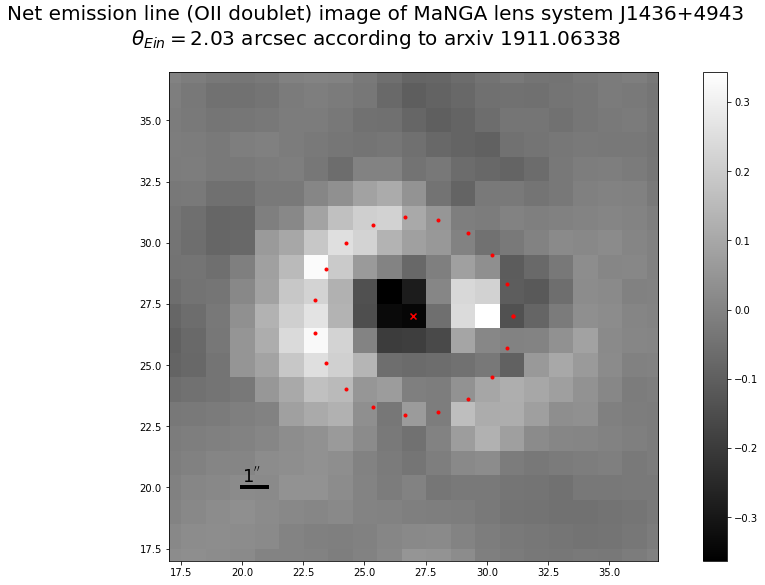

In [412]:
# image_hist = plt.hist(final_image.flatten(), 10)
plt.figure(figsize=(16,9))
ax = plt.gca()
# plt.imshow(narrow_band_img[27-5:27+5,27-5:27+5], cmap='gray',origin="low")#, vmin=2.e3, vmax=3.e3
centerx, centery = 27,27
plt.scatter(centerx, centery,c="r",marker="x")
cphi = np.linspace(0,2*np.pi,20)
r = 2.03*2
plt.scatter(centerx+r*np.cos(cphi),centery+r*np.sin(cphi),c="r",marker=".")

plt.imshow((narrow_band_img), cmap='gray',origin="low")#
plt.xlim(centerx-10,centerx+10)
plt.ylim(centery-10,centery+10)
plt.plot([20,21],[20,20],"k",linewidth = 4)
plt.annotate(r"$1^{''}$",xy=(20,20.2),size=18)
# cl = plt.Circle((28,28),2.03*2,color='r',alpha=0.1, lw=5, edgecolor='b')
# ax.add_artist(cl)
plt.colorbar()
title = "Net emission line (OII doublet) image of MaNGA lens system J1436+4943\n"\
+r"$\theta_{Ein}=2.03$ arcsec according to arxiv 1911.06338"
plt.suptitle(title,fontsize = 20)

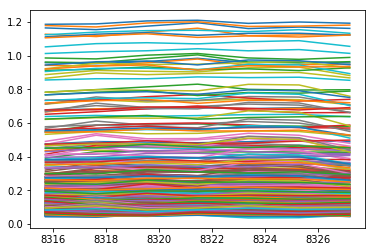

In [413]:
# plt.figure(figsize=(16,9))
# print(startindex)
# print(endindex)
for i in range(centerx-10,centerx+10):
    for j in range(centery-10,centery+10):
#         y = flux[:,i,j].value
        y = flux[startindex:endindex, i,j].value
        plt.plot(x[startindex:endindex],y)
# flux[startindex:endindex,0,0]

In [409]:
# it seems that wavelength is nonliner!

flux[0,0,0].wavelength
lambda0 = flux[0,0,0].wavelength.value
lambdaend = flux[-1,0,0].wavelength.value
print(lambda0)
print(lambdaend)
print("1 - 0>>>", flux[1,0,0].wavelength.value - lambda0)
print("2 - 1>>>", flux[2,0,0].wavelength.value - flux[1,0,0].wavelength.value)
print("3 - 2>>>", flux[3,0,0].wavelength.value - flux[2,0,0].wavelength.value)
# startindex, endindex = 0, 0
# for i in (flux[:,0,0].wavelength.value):
#     if i<8315:
#         startindex += 1
#     else:
#         break
# for i in (flux[:,0,0].wavelength.value):
#     if i<8335:
#         endindex += 1
#     else:
#         break
print(startindex)
print(endindex)
# 3610
# 3621
# before: 3181 3191

3621.5959848601933
10353.805444147549
1 - 0>>> 0.8339993067943396
2 - 1>>> 0.8341913643380394
3 - 2>>> 0.8343834661177425
3610
3617
